# <font color='black'>Data Pre-Processing</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import pandas.plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.pyplot import hist

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



df = pd.read_csv(r'C:\Users\karee\Downloads\Summer22_FootballTransfers.csv\Summer22_FootballTransfers.csv')

# <font color='black'>Loading Our Data Set</font>

In [3]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,9/1/2022


# <font color='black'>Changing The Players Status to Free Agent</font>

In [4]:
df['origin_club'].loc[df['origin_club']=='Without Club'].replace('Without Club', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Disqualification'].replace('Disqualification', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Career Break'].replace('Career Break', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Unknown'].replace('Unknown', 'Free Agent', inplace= True)

In [5]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,9/1/2022


# <font color='black'>Filling The Nulls</font>

In [6]:
df['league_origin_club'].fillna(value = 'Free Agent')
df['country_origin_club'].fillna(value = 'Free Agent')

0            France
1             Spain
2             Spain
3           Germany
4            France
            ...    
33620    Kazakhstan
33621       Romania
33622       Romania
33623      Bulgaria
33624       Tunisia
Name: country_origin_club, Length: 33625, dtype: object

In [7]:
df.isnull().sum()

name                      0
position                  0
age                     143
origin_club               0
league_origin_club      929
country_origin_club     929
new_club                  0
league_new_club        5570
country_new_club       5570
cost                      0
date_of_transfer          0
dtype: int64

In [8]:
df['league_origin_club']= df['league_origin_club'].fillna(method ='pad', axis=0)
df['country_origin_club']= df['country_origin_club'].fillna(method ='pad', axis=0)
df['league_new_club']= df['league_new_club'].fillna(method ='pad', axis=0)
df['country_new_club']= df['country_new_club'].fillna(method ='pad', axis=0)
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,9/1/2022


In [9]:
df.isnull().sum()

name                     0
position                 0
age                    143
origin_club              0
league_origin_club       0
country_origin_club      0
new_club                 0
league_new_club          0
country_new_club         0
cost                     0
date_of_transfer         0
dtype: int64

In [10]:
df.dtypes

name                    object
position                object
age                    float64
origin_club             object
league_origin_club      object
country_origin_club     object
new_club                object
league_new_club         object
country_new_club        object
cost                    object
date_of_transfer        object
dtype: object

# <font color='black'>Changing The DataTypes Of Columns</font>

In [13]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('€', '').replace('.', '').replace('m', '0000').replace('Th','0'))
    return(x)

In [14]:
df['cost'] = df['cost'].apply(clean_currency).astype('long')

In [15]:
df = df.sort_values(by:=['cost'], inplace=False, ascending=False)

In [22]:
df['date_of_transfer'] = pd.to_datetime(df['date_of_transfer'])

In [16]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,7/1/2022
12700,Matthijs de Ligt,Centre-Back,22.0,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,7/19/2022
19261,Sadio Mané,Left Winger,30.0,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,7/1/2022
19303,Romelu Lukaku,Centre-Forward,29.0,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,7/1/2022
15126,Raheem Sterling,Left Winger,27.0,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,7/13/2022


In [17]:
df['age'].unique()

array([21., 22., 30., 29., 27., 24., 23., 26., 25., 33., 20., 28., 31.,
       19., 18., 32., 34., 35., 17., 37., 36., 39., 16., 38., 40., nan,
       43., 42., 41., 45., 15., 44., 46.])

# <font color='black'>Getting Rid of the Nulls</font>

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

name                   0
position               0
age                    0
origin_club            0
league_origin_club     0
country_origin_club    0
new_club               0
league_new_club        0
country_new_club       0
cost                   0
date_of_transfer       0
dtype: int64

In [20]:
df['age'] = df['age'].astype('int64') 

In [23]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio Mané,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


# <font color='black'>Showing All the Transfers OUT And Into The Top 5 leagues</font>

In [24]:
#PremierLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'England')
 #   | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')]

#Liga = df[(df['league_origin_club']=='La Liga') & (df['country_origin_club']== 'Spain')
 #   | (df['league_new_club']=='La Liga') & (df['country_new_club']== 'Spain')]

#EgyptianLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'Egypt')
 #   | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'Egypt')]

#Ligue1 = df[(df['league_origin_club']=='Ligue 1') & (df['country_origin_club']== 'France')
 #   | (df['league_new_club']=='Ligue 1') & (df['country_new_club']== 'France')]


#SerieA = df[(df['league_origin_club']=='Serie A') & (df['country_origin_club']== 'Italy')
 #   | (df['league_new_club']=='Serie A') & (df['country_new_club']== 'Italy')]


#BundesLiga = df[(df['league_origin_club']=='Bundesliga') & (df['country_origin_club']== 'Germany')
 #   | (df['league_new_club']=='Bundesliga') & (df['country_new_club']== 'Germany')]



In [25]:
#TransfersTop5 = pd.concat([PremierLeague, Liga, Ligue1, SerieA, BundesLiga])
#TransfersTop5.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
19261,Sadio Mané,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin Núñez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01


## <font color='black'>Showing The Transfer Market For The Premier League Only</font>

In [24]:
df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'England')
    | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')].head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
19261,Sadio Mané,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin Núñez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01


### <font color='black'>Number of Players Transfered Under the Age Of 30</font>

In [25]:
AgePreferance = df[(df['age'] < 30)]
len(AgePreferance.index)

27025

### <font color='black'>Number of Players Transfered Above the Age Of 30</font>

In [26]:
Age_Preferance = df[(df['age'] >= 30)]
len(Age_Preferance.index)

6457

### <font color='black'>Number of Players Purchased According To Their Positions</font>

In [36]:
TransfersTop5['position'].value_counts().head(13)

Centre-Back           198
Centre-Forward        168
Central Midfield      154
Goalkeeper            122
Left-Back              94
Right-Back             93
Defensive Midfield     86
Left Winger            76
Attacking Midfield     69
Right Winger           68
Right Midfield         16
Second Striker         12
Left Midfield           8
Name: position, dtype: int64

In [28]:
AttackingPositions = df[
    (df['position'] == 'Centre-Forward')
    | (df['position'] =='Left Winger') 
    | (df['position'] =='Right Winger') 
    | (df['position'] =='attack') 
    | (df['position'] =='Second Striker')]
len(AttackingPositions.index)

10015

In [29]:
MidfieldPositions = df[
    (df['position'] == 'Central Midfield') 
 |  (df['position'] =='Defensive Midfield') 
 |  (df['position'] =='Left Midfield') 
 |  (df['position'] =='Right Midfield') 
 |  (df['position'] =='Attacking Midfield') 
 |  (df['position'] =='midfield')]
len(MidfieldPositions.index)

9778

In [30]:
DefendingPositions = df[
    (df['position'] == 'defence') 
    | (df['position'] =='Centre-Back') 
    | (df['position'] =='Left-Back') 
    | (df['position'] =='Right-Back') 
    | (df['position'] =='Goalkeeper')]
len(DefendingPositions.index)

13689

In [31]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio Mané,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


### <font color='black'>Players That Were Only Purchased By The Top 5 leagues</font>

In [32]:
PremierLeague = df[(df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')]

Liga = df[(df['league_new_club']=='LaLiga') & (df['country_new_club']== 'Spain')]

#EgyptianLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'Egypt')
 #   | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'Egypt')]

Ligue1 = df[(df['league_new_club']=='Ligue 1') & (df['country_new_club']== 'France')]


SerieA = df[(df['league_new_club']=='Serie A') & (df['country_new_club']== 'Italy')]


BundesLiga = df[(df['league_new_club']=='Bundesliga') & (df['country_new_club']== 'Germany')]


In [33]:
TransfersTop5 = pd.concat([PremierLeague, Liga, Ligue1, SerieA, BundesLiga])
TransfersTop5

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin Núñez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01
18501,Kalvin Phillips,Defensive Midfield,26,Leeds United,Premier League,England,Manchester City,Premier League,England,50000000,2022-07-04
18500,Gabriel Jesus,Centre-Forward,25,Manchester City,Premier League,England,Arsenal FC,Premier League,England,50000000,2022-07-04
...,...,...,...,...,...,...,...,...,...,...,...
31035,Mihaita Nastase,Centre-Forward,22,ACS Recolta Gheorghe Doja,Romania,Romania,Without Club,Bundesliga,Germany,250,2022-07-01
29434,Adrian Popa,Defensive Midfield,33,CAO 1910 Oradea (2016 - 2022),Romania,Romania,Without Club,Bundesliga,Germany,250,2022-07-01
29424,Zarko Grbovic,attack,27,FK Iskra Danilovgrad,1. CFL,Montenegro,Without Club,Bundesliga,Germany,250,2022-07-01
29431,Matay Birol,Goalkeeper,24,FC Gießen,Hessenliga,Germany,Without Club,Bundesliga,Germany,100,2022-07-01


### <font color='black'>Using Graph Plot To Demonstrate The Time Of Purchases In The Transfer Window</font>

<AxesSubplot:xlabel='date_of_transfer'>

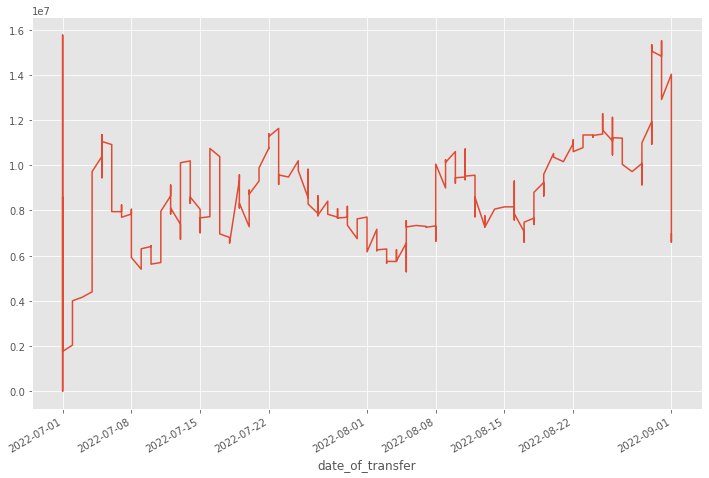

In [39]:
TransfersTop5.sort_index(inplace=True)
TransfersTop5['cost'].rolling(25).mean().plot()

##### <font color='black'>Using Histogram To Demonstrate How Likely To Be Purchased By The Top 5 Leagues If Your Age Is Between 20 And 30</font>

NameError: name 'StrMethodFormatter' is not defined

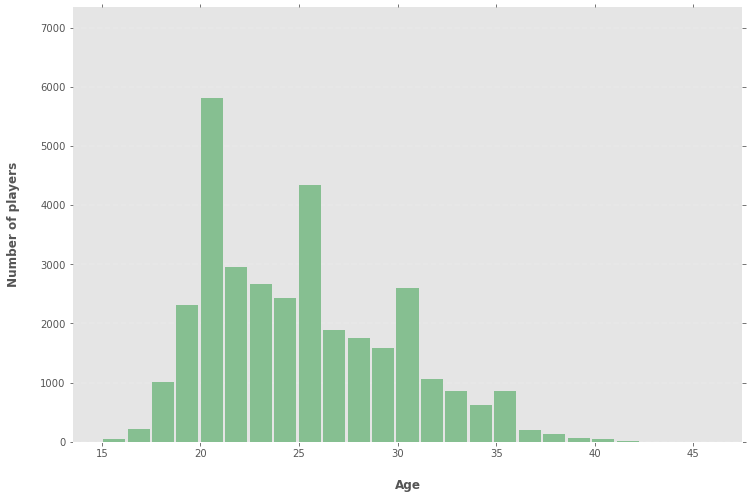

In [48]:
ax = df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of players", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

### <font color='black'>Showing The Most Expensive Players According To Their Positions Using Bar Plot</font>

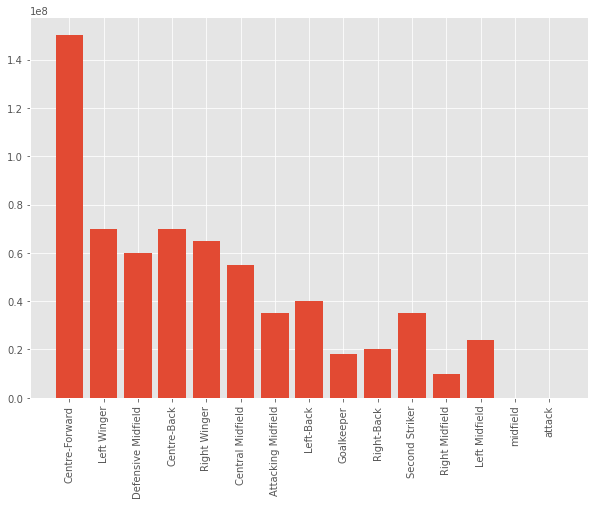

In [35]:
position = TransfersTop5['position']
cost = TransfersTop5['cost']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(position, cost)
plt.xticks(rotation = 90)
 
# Show Plot
plt.show()

### <font color='black'>Showing Which League Has Paid More During The Transfer Window</font>

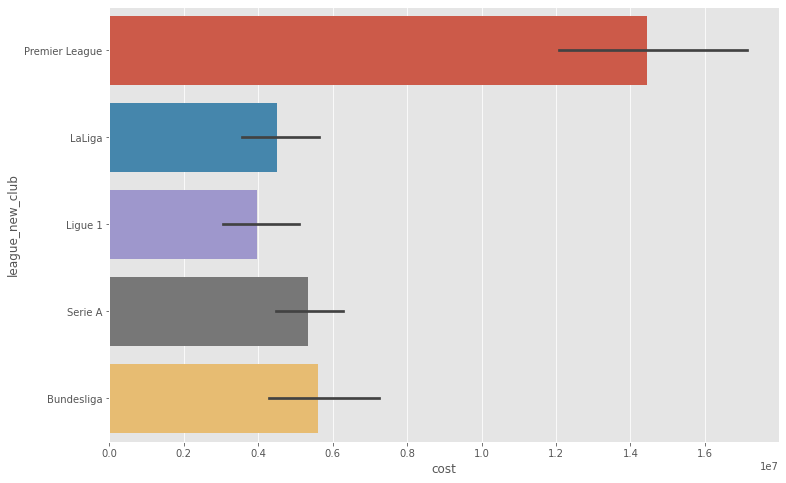

In [37]:
labels = TransfersTop5['league_new_club']

price = TransfersTop5['cost']

sns.barplot(x=price,y=labels)

plt.show()

plt.show()